In [1]:
from viresclient import SwarmRequest
import cdflib
import datetime as dt
import pandas as pd
%matplotlib inline

In [2]:
dfs = {"A":None, "B":None, "C":None}
for sat in "ABC":
    request = SwarmRequest("https://staging.viresdisc.vires.services/openows")
    request.set_collection(f"SW_OPER_MAG{sat}_LR_1B")
    request.set_products(
         auxiliaries=[
             'OrbitNumber',
             'AscendingNodeTime',
             'AscendingNodeLongitude',
             'SunDeclination',
             'SunHourAngle',
             'SunRightAscension',
             'SunAzimuthAngle',
             'SunZenithAngle',
             'SunLongitude',
         ],
         sampling_step="PT10M"
    )
    dfs[sat] = request.get_between(
        start_time="2013-11-25T00:00:00Z",
        end_time="2014-01-01T00:00:00Z"
    ).as_dataframe()

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:03, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.635MB)
[1/1] Processing:  100%|██████████|  [ Elapsed: 00:03, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.635MB)
[1/1] Processing:  100%|██████████|  [ Elapsed: 00:03, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.536MB)


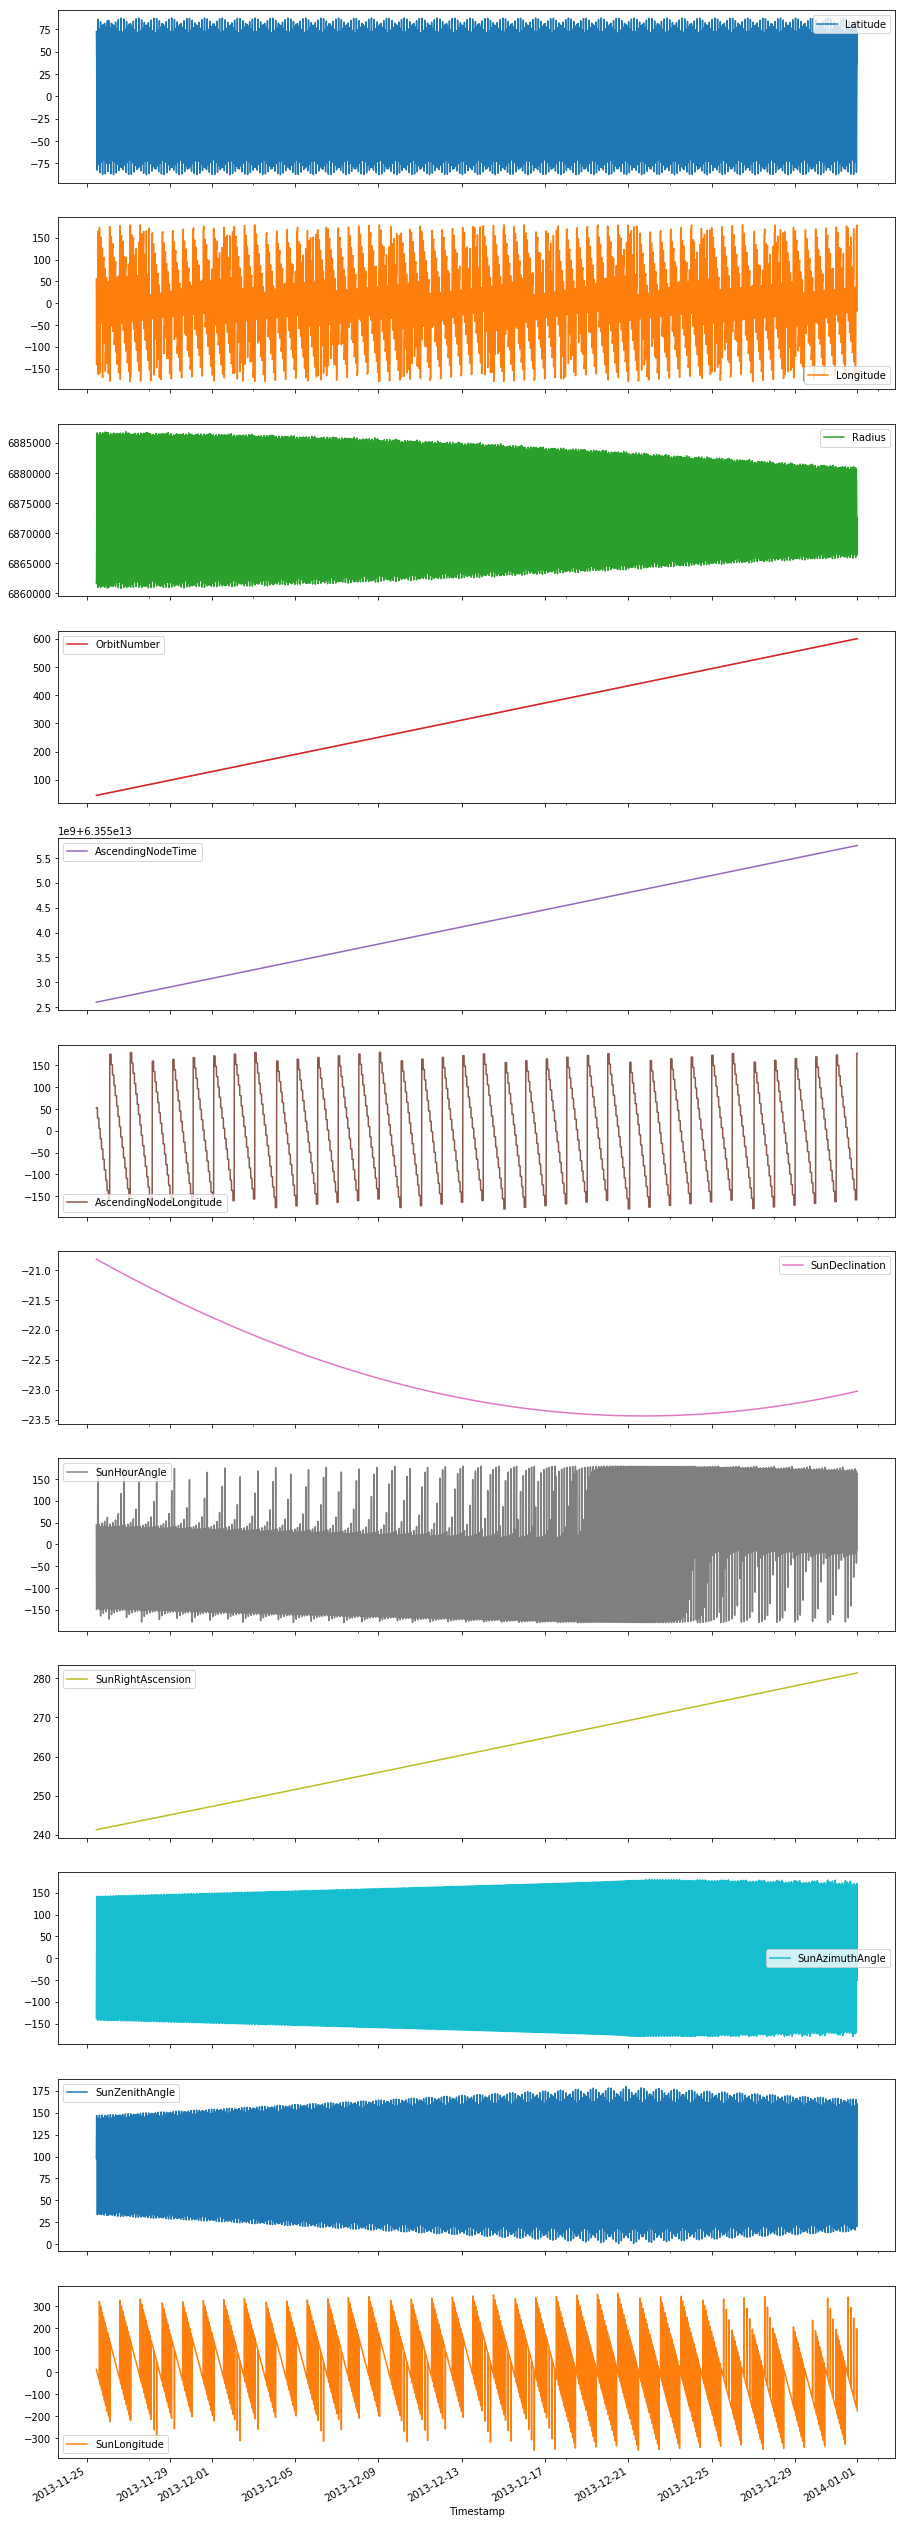

In [3]:
dfs["A"].plot(subplots=True, figsize=(15,50));

In [4]:
df = pd.concat(dfs)

In [5]:
# Convert AscendingNodeTime from CDF_EPOCH to datetimes
# CDF_EPOCH is number of ms from year 0
CDF_EPOCH_UNIX_TIME_OFFSET = cdflib.cdfepoch.compute_epoch([1970,1,1,0,0,0,0],)  # returns 62167219200000.0
df["AscendingNodeTime_dt"] = pd.to_datetime(
    df["AscendingNodeTime"] - CDF_EPOCH_UNIX_TIME_OFFSET,
    unit="ms"
)

`AscendingNodeTime` is currently incorrect and is identical to `Timestamp`

In [6]:
df.loc["A"][["AscendingNodeTime_dt", "AscendingNodeLongitude"]]

,AscendingNodeTime_dt,AscendingNodeLongitude
Timestamp,,
2013-11-25 11:02:52,2013-11-25 11:02:52,52.834
2013-11-25 11:12:52,2013-11-25 11:12:52,52.834
2013-11-25 11:22:52,2013-11-25 11:22:52,52.834
2013-11-25 11:32:52,2013-11-25 11:32:52,52.834
2013-11-25 11:42:52,2013-11-25 11:42:52,52.834
2013-11-25 11:52:52,2013-11-25 11:52:52,52.834
2013-11-25 12:02:52,2013-11-25 12:02:52,52.834
2013-11-25 12:12:52,2013-11-25 12:12:52,52.834
2013-11-25 12:22:52,2013-11-25 12:22:52,29.100


In [ ]:
# Calculate Local Time of Ascending Node (LTAN)
#  from AN time and AN longitude

def calc_LTAN(UThour=None, longitude=None):
    return (UThour - longitude/15)%24

UT = df["AscendingNodeTime_dt"]
UThour = UT.dt.hour + UT.dt.minute/60
df["LTAN"] = calc_LTAN(
    UThour=UThour,
    longitude=df["AscendingNodeLongitude"]
)

In [ ]:
df.loc["A"].plot(y="LTAN")